In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('data - Copy.csv')
#print(data.head())
y_data_unscaled = data['target']
scaler_y = MinMaxScaler()
y_data_scaled = scaler_y.fit_transform(np.array(y_data_unscaled).reshape(-1,1))
scaler = MinMaxScaler()     # selecting Normalizer
data = scaler.fit_transform(data)   #Normalizing data
#print(data[0:5,:])
new = scaler.inverse_transform(data)
#print(new[0:5,:])
y_data = data[:,7]    #selecting target
my_len = 1             # how many rows?
counter = 0
data_arr = np.zeros((len(data), 7))
target_arr = np.zeros((len(data) ,1))
while counter < len(data) :     # forming data array and target array
    data_arr[counter,:] = data[counter,0:7]
    target_arr[counter] = y_data[counter]
    counter += 1

def Average(lst):
    return sum(lst) / len(lst)



In [ ]:
data_arr.shape, target_arr.shape
# print(data_arr[0], target_arr[0])
# print(data[0])

((470, 7), (470, 1))

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data, target, transform=None, target_transform=None):
        self.data = torch.tensor(data)
        self.target = torch.tensor(target)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        array = self.data[idx,:]
        label = self.target[idx]
        if self.transform:
            array = self.transform(array)
        if self.target_transform:
            label = self.target_transform(label)
        return array, label

In [ ]:
complete_dataset = CustomDataset(data_arr,target_arr)
train_dataset = CustomDataset(data_arr[0:376],target_arr[0:376])
#test_dataset = CustomDataset(data_arr[300:len(target_arr)],target_arr[300:len(target_arr)])
test_dataset = CustomDataset(data_arr[376:471],target_arr[376:471])

In [ ]:
train_dataset[0]

(tensor([0.0102, 0.0698, 0.0386, 0.0384, 0.0441, 0.0422, 0.0771],
        dtype=torch.float64),
 tensor([0.0847], dtype=torch.float64))

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset , shuffle=True, batch_size=256)
test_loader  = torch.utils.data.DataLoader(test_dataset, shuffle=True,  batch_size=16)

In [ ]:
len(train_dataset), len(test_dataset)

(376, 94)

In [ ]:
for a,b in train_loader:
    print(a.shape)
    break

torch.Size([256, 7])


In [ ]:
class BN_net(nn.Module):
    def __init__(self):
        super(BN_net, self).__init__()
        self.conv1 = nn.Conv1d(my_len, 20, 3) #input = (batchsize, my_len=5, 11) output = (
        self.conv2 = nn.Conv1d(20, 40, 3)
        self.dropout1 = nn.Dropout(0.05)
        self.dropout2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(240, 100)
        self.fc2 = nn.Linear(100, 1)
        self.bn1 = nn.BatchNorm1d(20)
        self.bn2 = nn.BatchNorm1d(40)

    def forward(self, x):
        x = self.conv1(x.view([-1, 1, 10]))
        x = F.relu(self.bn1(x))
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.dropout1(x)
        #print(x.shape)
        #x = torch.flatten(x, 0)
        x = self.fc1(x.view(-1,240))
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [ ]:
class my_net(nn.Module):
    def __init__(self):
        super(my_net, self).__init__()
        self.conv1 = nn.Conv1d(my_len, 20, 3) #input = (batchsize, my_len=5, 11) output = (
        self.conv2 = nn.Conv1d(20, 40, 3)
        self.dropout1 = nn.Dropout(0.05)
        self.dropout2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(120, 100)
        self.fc2 = nn.Linear(100, 1)


    def forward(self, x):
        x = self.conv1(x.view([-1, 1, 7]))
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.dropout1(x)
        #print(x.shape)
        #x = torch.flatten(x, 0)
        x = self.fc1(x.view(-1,120))
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [ ]:
class my_net1(nn.Module):
    def __init__(self):
        super(my_net1, self).__init__()

        self.dropout1 = nn.Dropout(0.05)
        self.dropout2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(10, 100)
        self.fc2 = nn.Linear(100, 200)
        self.fc3 = nn.Linear(200, 200)
        self.fc4 = nn.Linear(200, 10)
        self.fc5 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x.view([-1, 10]))
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout1(x)
        #print(x.shape)
        #x = torch.flatten(x, 0)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc5(x)
        return x

In [ ]:
class my_net2(nn.Module):
    def __init__(self):
        super(my_net2, self).__init__()
        self.conv1 = nn.Conv1d(my_len, 20, 3) #input = (batchsize, my_len=5, 11) output = (
        self.conv2 = nn.Conv1d(20, 100, 3)
        self.dropout1 = nn.Dropout(0.05)
        self.dropout2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(600, 100)
        self.fc2 = nn.Linear(100, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.conv1(x.view([-1, 1, 10]))
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.dropout1(x)
        #print(x.shape)
        #x = torch.flatten(x, 0)
        x = self.fc1(x.view(-1,600))
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [ ]:
class my_net3(nn.Module):
    def __init__(self):
        super(my_net3, self).__init__()
        self.conv1 = nn.Conv1d(my_len, 10, 3) #input = (batchsize, my_len=5, 11) output = (
        self.conv2 = nn.Conv1d(10, 20, 3)
        self.dropout1 = nn.Dropout(0.05)
        self.dropout2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(120, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.conv1(x.view([-1, 1, 10]))
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.dropout1(x)
        #print(x.shape)
        #x = torch.flatten(x, 0)
        x = self.fc1(x.view(-1,120))
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [ ]:
class fc_net(nn.Module):
    def __init__(self):
        super(fc_net, self).__init__()

        self.dropout1 = nn.Dropout(0.05)
        self.dropout2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 1000)
        self.fc3 = nn.Linear(1000, 20)
        self.fc4 = nn.Linear(20, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc4(x)
        return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
model = my_net().double()
model = model.to(device)
print(model)

my_net(
  (conv1): Conv1d(1, 20, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(20, 40, kernel_size=(3,), stride=(1,))
  (dropout1): Dropout(p=0.05, inplace=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=120, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self,yhat,y):
        return torch.sqrt(self.mse(yhat,y))

In [ ]:
criterion = nn.MSELoss()
criterion1 = nn.L1Loss()
criterion2 = RMSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

In [ ]:
for a,b in train_loader:
    print(a[1],b[1])


tensor([0.2822, 0.1895, 0.3382, 0.3596, 0.3192, 0.1735, 0.3974],
       dtype=torch.float64) tensor([0.4297], dtype=torch.float64)
tensor([0.2298, 0.7835, 0.6659, 0.1375, 0.4083, 0.0963, 0.4301],
       dtype=torch.float64) tensor([0.5209], dtype=torch.float64)


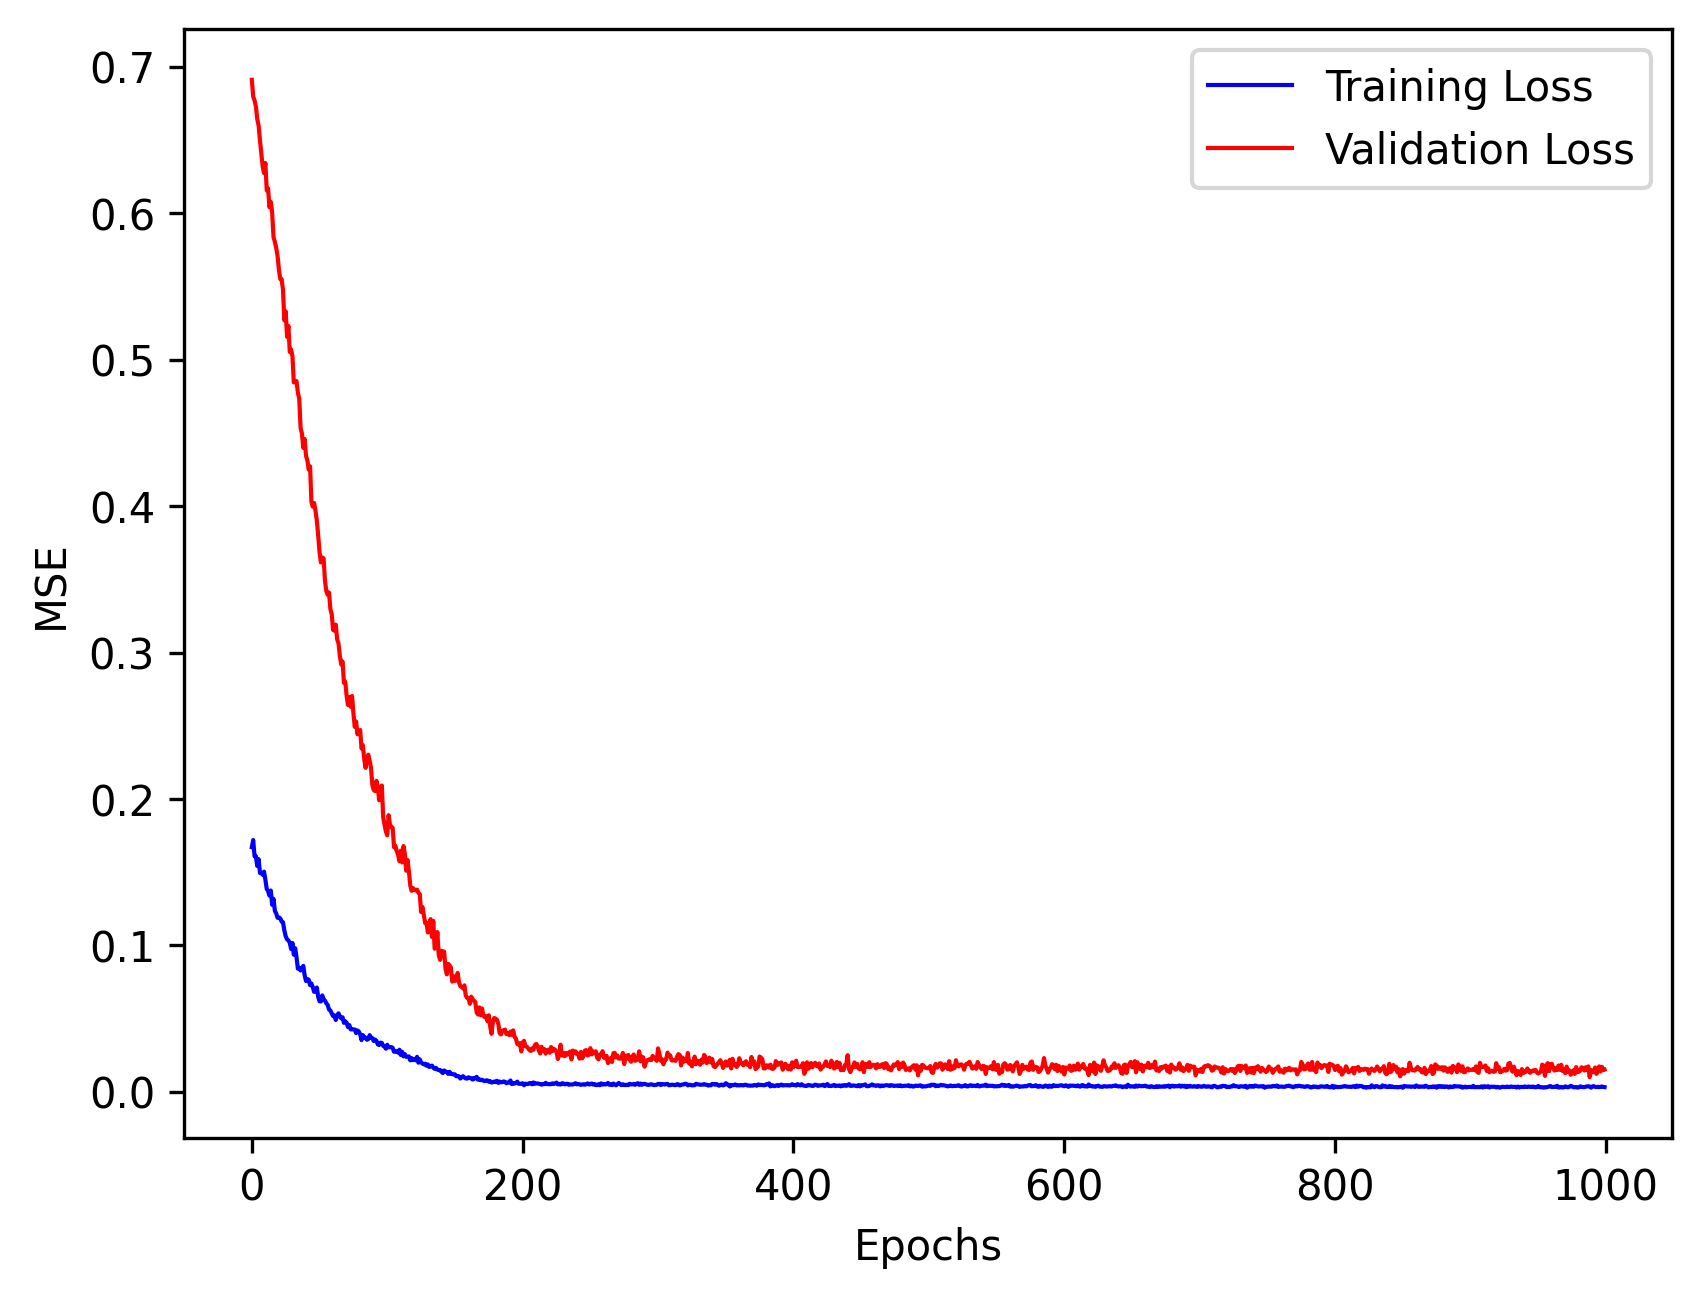

In [ ]:
# test(model, device, test_loader)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_loss = []
test_loss = []
train_loss1 = []
test_loss1 = []
train_loss2 = []
test_loss2 = []
test_iterloss = []
with torch.no_grad():
    model.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        model.train()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_iterloss.append(loss.item())



for epoch in range(1000):
    train_iterloss=[]
    test_iterloss = []
    train_iterloss1=[]
    test_iterloss1 = []
    train_iterloss2=[]
    test_iterloss2 = []
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        model.train()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss1 = criterion1(outputs, labels)
        loss2 = criterion2(outputs, labels)

        train_iterloss.append(loss.item())
        train_iterloss1.append(loss1.item())
        train_iterloss2.append(loss2.item())

        loss.backward()

        optimizer.step()

        optimizer.zero_grad()
    with torch.no_grad():
        model.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        model.train()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss1 = criterion1(outputs, labels)
        loss2 = criterion2(outputs, labels)

        test_iterloss.append(loss.item())
        test_iterloss1.append(loss1.item())
        test_iterloss2.append(loss2.item())

    train_loss.append(sum(train_iterloss)/len(train_iterloss))
    test_loss.append(sum(test_iterloss)/len(test_iterloss))
    train_loss1.append(sum(train_iterloss1)/len(train_iterloss1))
    test_loss1.append(sum(test_iterloss1)/len(test_iterloss1))
    train_loss2.append(sum(train_iterloss2)/len(train_iterloss2))
    test_loss2.append(sum(test_iterloss2)/len(test_iterloss2))
    #print('epoch=',epoch,'train loss=', sum(train_iterloss)/len(train_iterloss), 'test_loss=', sum(test_iterloss)/len(test_iterloss))



        # test(model, device, test_loader)
plt.plot(train_loss,label='Training Loss',color='blue',linewidth=1)
plt.plot(test_loss,label='Validation Loss',color='red',linewidth=1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
train_loss[:],test_loss[:]
avg_trainL = Average(train_loss)
avg_testL = Average(test_loss)
avg_trainL , avg_testL

(0.01250286171193232, 0.0633708810245596)

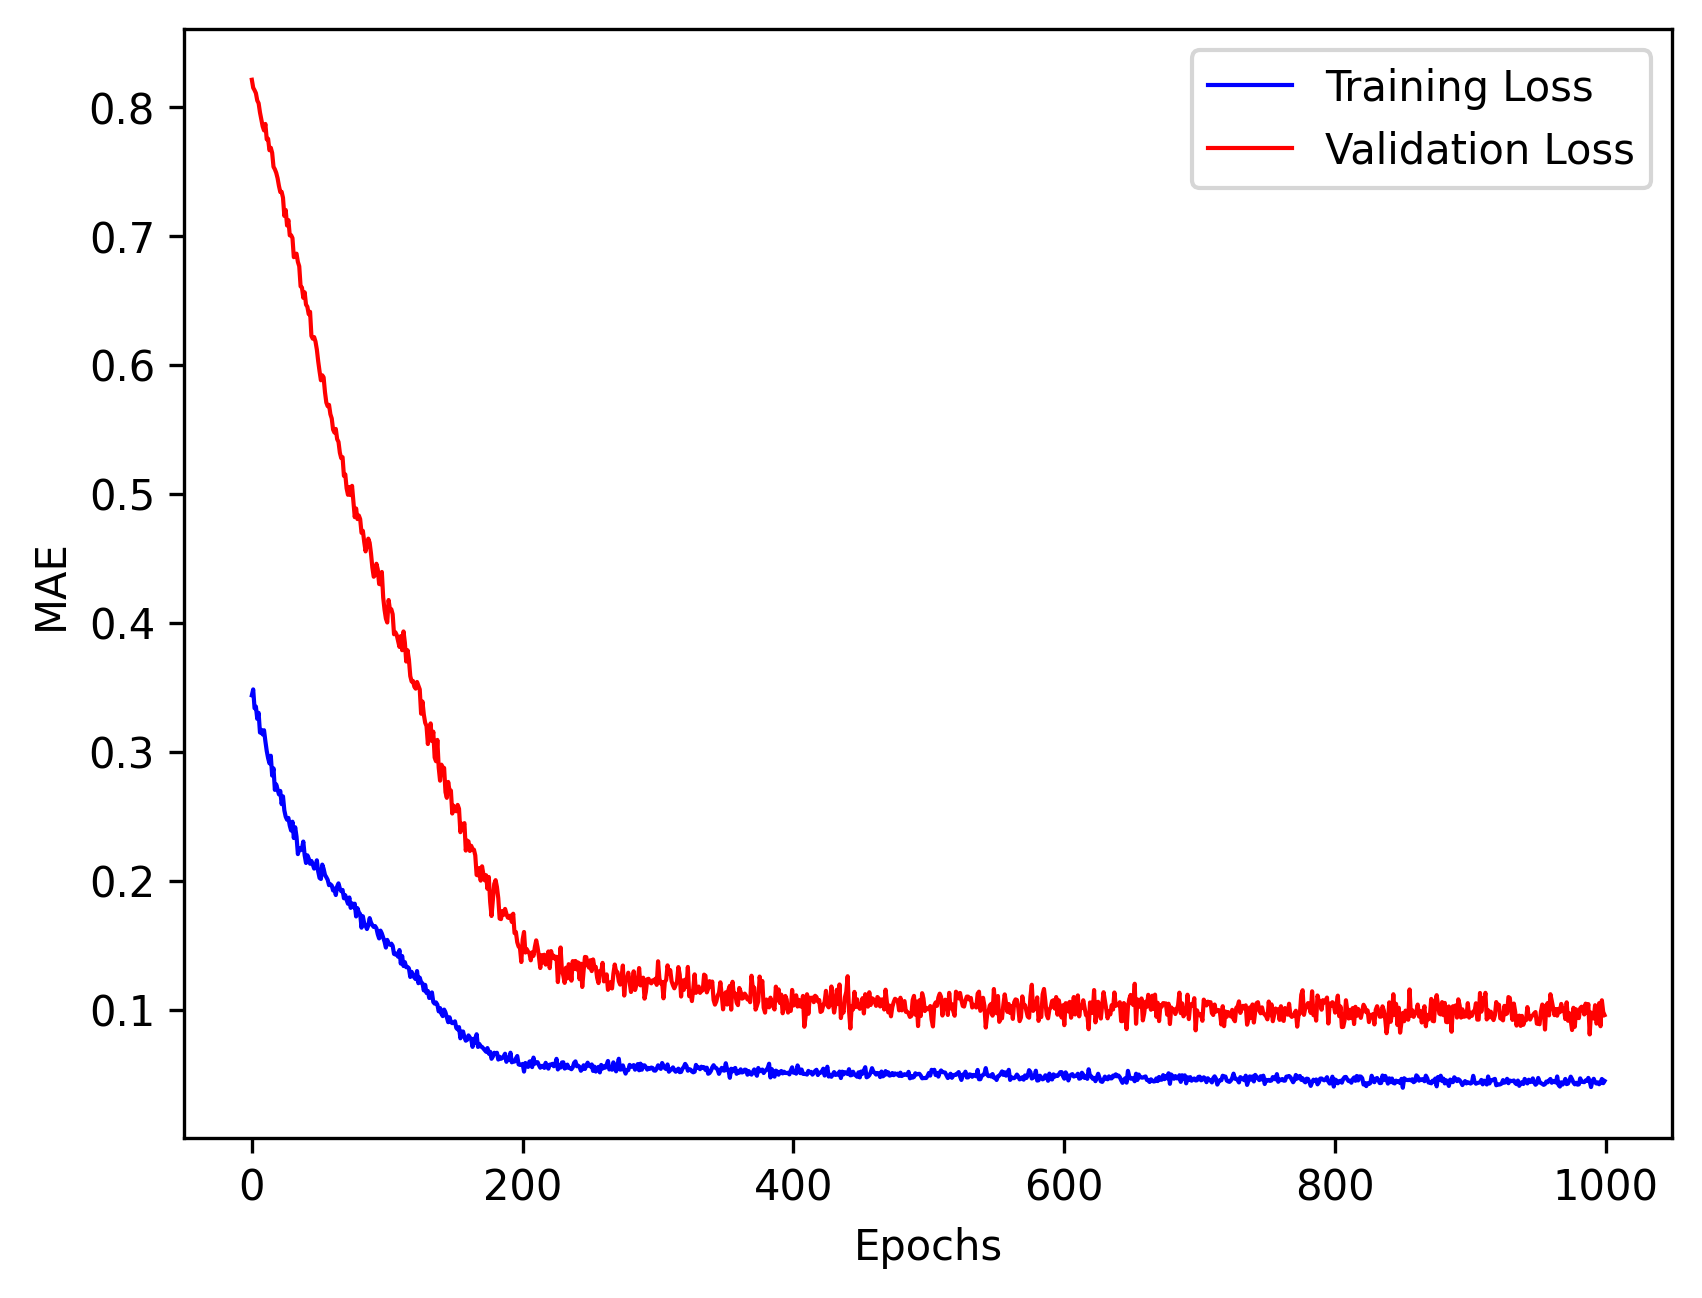

In [ ]:
plt.plot(train_loss1,label='Training Loss',color='blue',linewidth=1)
plt.plot(test_loss1,label='Validation Loss',color='red',linewidth=1)
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
train_loss1[:],test_loss1[:]
avg_trainL1 = Average(train_loss1)
avg_testL1 = Average(test_loss1)
avg_trainL1 , avg_testL1

(0.07064675769145382, 0.17241721333878016)

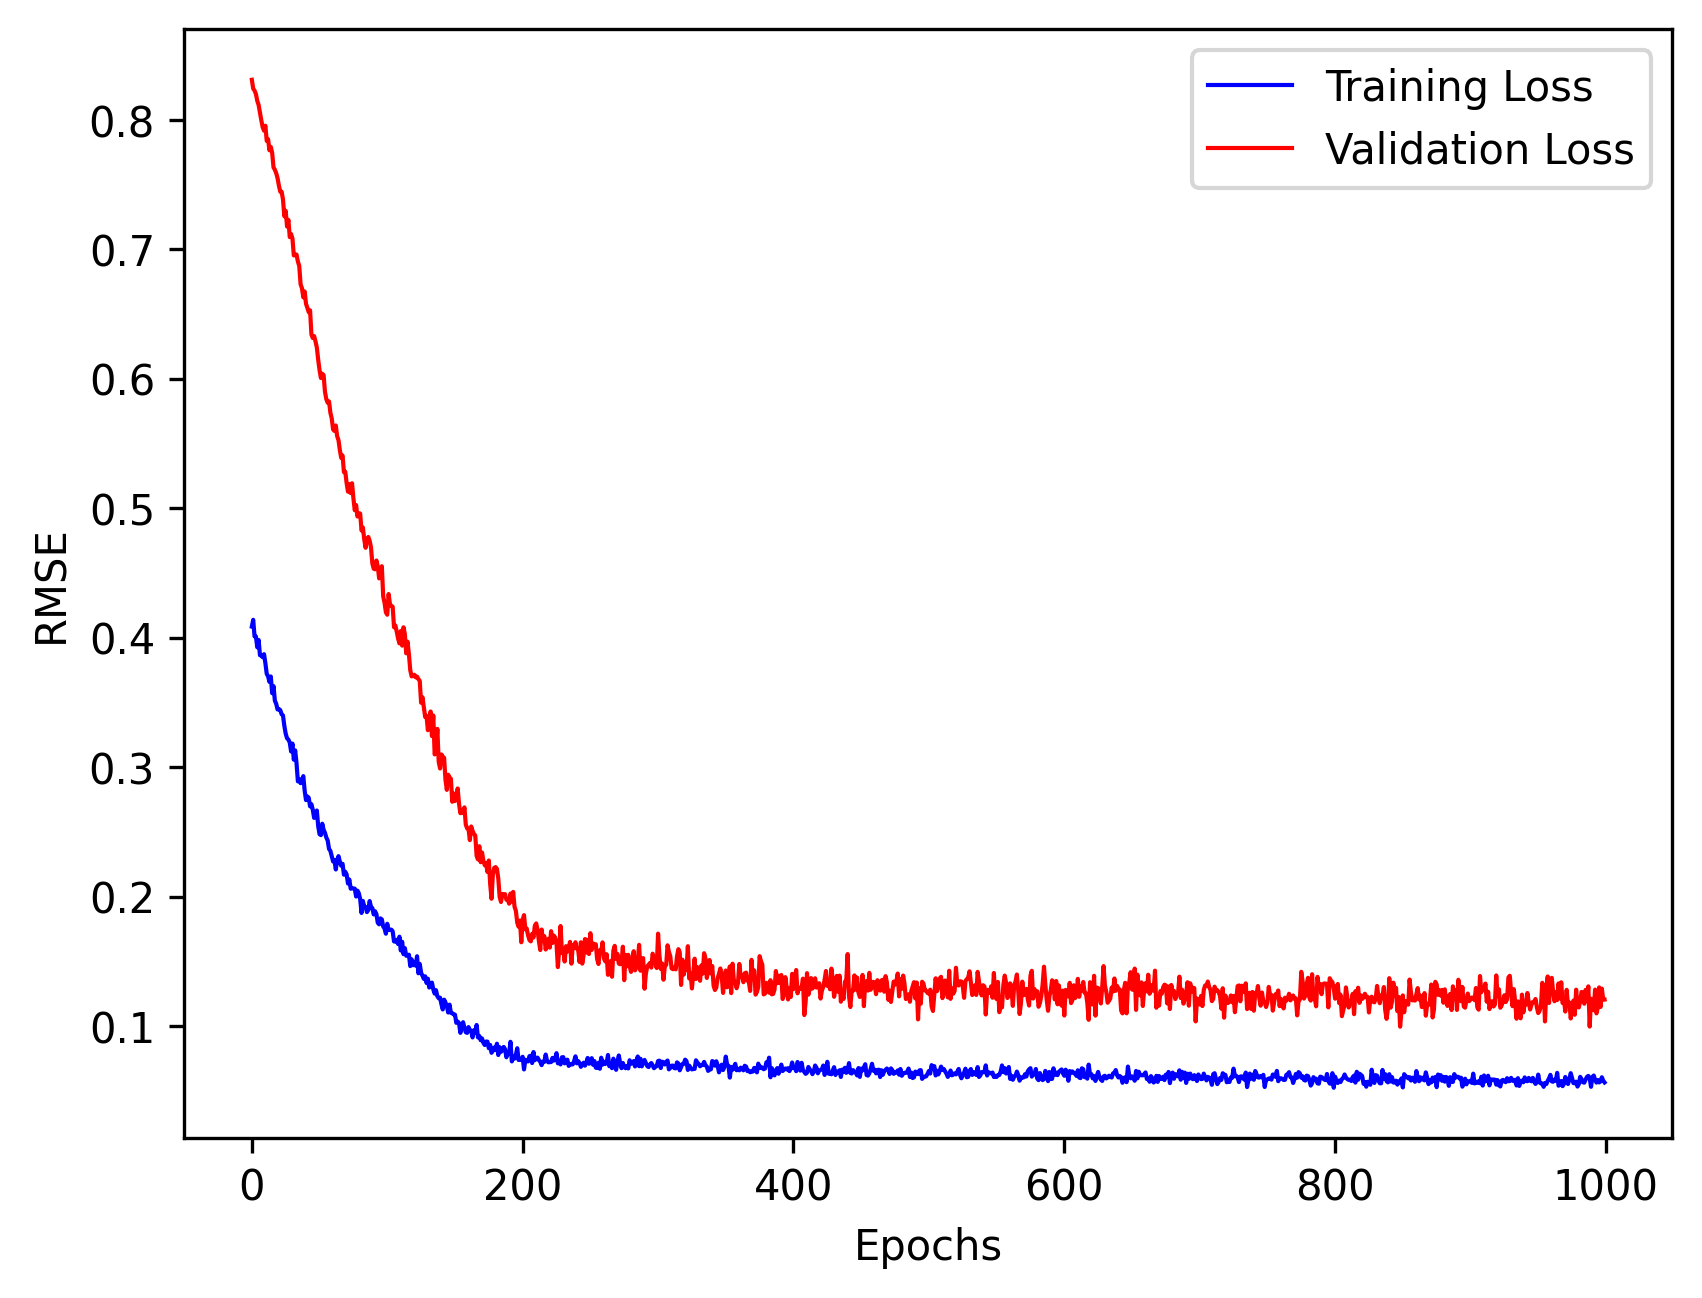

In [ ]:
plt.plot(train_loss2,label='Training Loss',color='blue',linewidth=1)
plt.plot(test_loss2,label='Validation Loss',color='red',linewidth=1)
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
train_loss2[:],test_loss2[:]
avg_trainL2 = Average(train_loss2)
avg_testL2 = Average(test_loss2)
avg_trainL2 , avg_testL2

(0.08933985917159723, 0.19586900945019578)

epoch= 0 train loss= 0.004168217231251541
epoch= 1 train loss= 0.004118982400072195


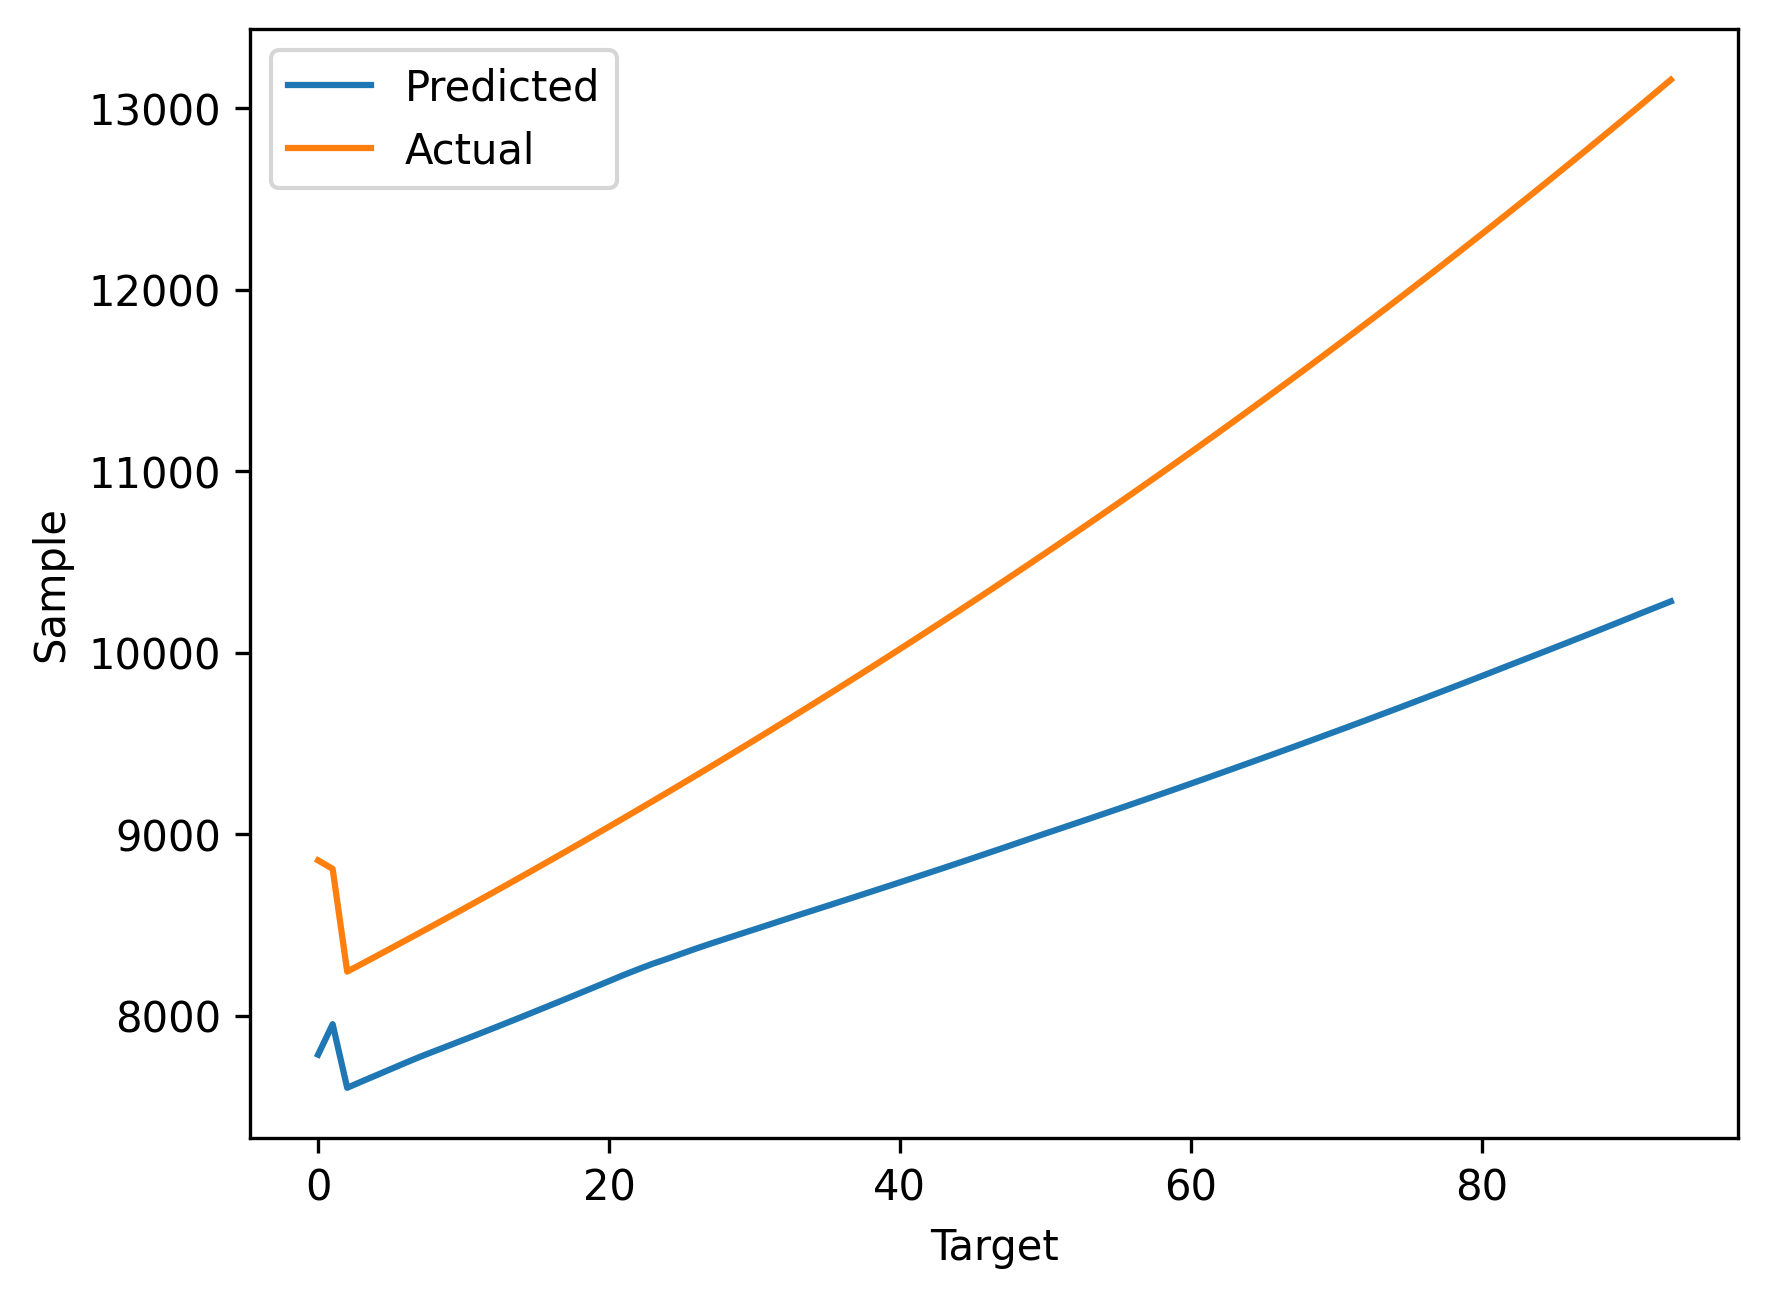

In [ ]:
# test(model, device, test_loader)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(2):
    iterloss=[]
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        model.train()

        outputs = model(inputs)

        loss = criterion(outputs, labels)

        iterloss.append(loss.item())

        loss.backward()

        optimizer.step()

        optimizer.zero_grad()

    print('epoch=',epoch,'train loss=', sum(iterloss)/len(iterloss))

    with torch.no_grad():
        model.eval()

        # test(model, device, test_loader)

a, b = test_dataset[0:95]
model.eval()
out = model(a.to(device))
out = scaler_y.inverse_transform(out.cpu().detach().numpy())
plt.plot(out,label='Predicted')
b = scaler_y.inverse_transform(b)
plt.plot(b, label='Actual')
plt.xlabel('Target')
plt.ylabel('Sample')
plt.legend()

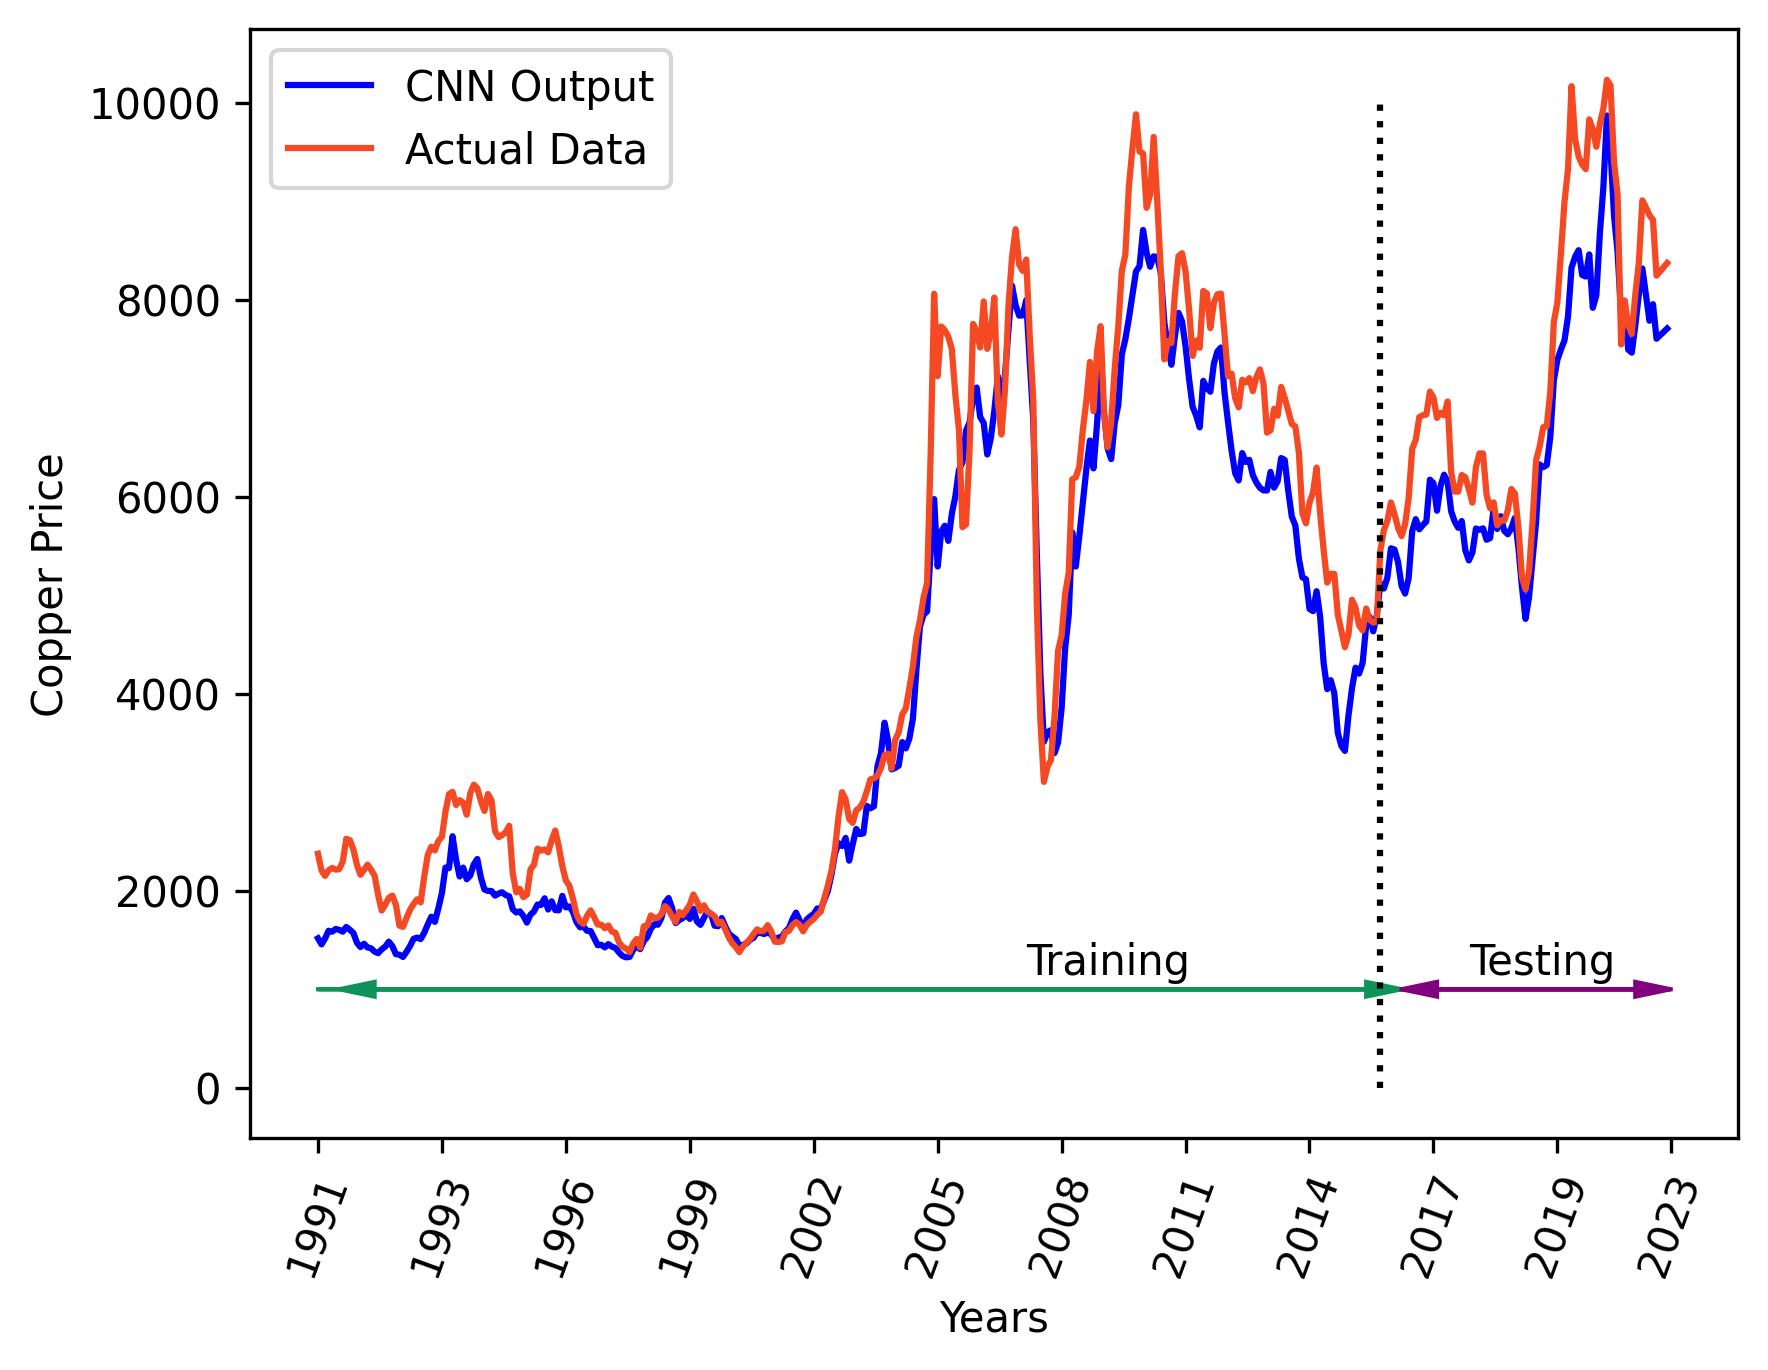

In [ ]:
a, b = complete_dataset[0:471]
out = model(a.to(device))
out = scaler_y.inverse_transform(out.cpu().detach().numpy())
plt.plot(out[:382],label='CNN Output', color='b')
b = scaler_y.inverse_transform(b)
plt.plot(b[:382], label='Actual Data', color='#F54924')
plt.xlabel('Years')
plt.ylabel('Copper Price')

plt.xticks([0,35,70,105,140,175,210,245,280,315,350,382], ['1991', '1993', '1996',"1999","2002",'2005','2008',"2011","2014",
                                                "2017","2019","2023"],rotation=70)
plt.arrow(0,1000, 306, 0, color='#0F935B',
          head_length = 10, head_width = 150,
          length_includes_head = True)

plt.arrow(306,1000, -300, 0, color='#0F935B',
          head_length = 10, head_width = 150,
          length_includes_head = True)

plt.arrow(306, 1000, 76, 0, color='purple',
          head_length = 10, head_width = 150,
          length_includes_head = True)

plt.arrow(382, 1000, -76, 0, color='purple',
          head_length = 10, head_width = 150,
          length_includes_head = True)
plt.vlines(300, 0, 10000, linestyles ="dotted", colors ="k")
plt.text(200, 1150, 'Training')
plt.text(325, 1150, 'Testing')
plt.rcParams["figure.dpi"] = 300
plt.legend()

In [ ]:
from sklearn.linear_model import LinearRegression
modelsc = LinearRegression()
modelsc.fit(a, b)
r_squared = modelsc.score(a, b)
print(f'R-Squared is: {r_squared}')


R-Squared is: 0.98164603247816


In [ ]:
pred= [b[382:471] , out[382:471]]

In [ ]:
import xlsxwriter

workbook = xlsxwriter.Workbook('/content/pred.xlsx')
worksheet = workbook.add_worksheet()

row = 0

for col, data in enumerate(pred):
    worksheet.write_column(row, col, data)

workbook.close()